In [79]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import optuna

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


In [2]:
df_train = pd.read_excel('DATA GAMA CUTE-MIPA.xlsx', sheet_name = 'modellingtraining', header=1)
df_test = pd.read_excel('DATA GAMA CUTE-MIPA.xlsx', sheet_name = 'testing', header=1)

In [3]:
df_train = df_train[['RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'RDW', 'Diagnosis']]
df_train.head()

,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,Diagnosis
0,3.78,9,"29,4",77.7,"23,8","30,7","21,1",BTT
1,5.94,"10,3",37.5,63.1,"17,4","27,5","15,9",BTT
2,5.93,"10,8",34.4,58.0,"18,2","31,3",16,BTT
3,5.29,11,37.6,71.0,20.7,29.2,16.9,BTT
4,5.79,11,37,63.9,19,29.7,16.6,BTT


In [4]:
df_test = df_test[['RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'RDW', 'Diagnosis']]
df_test.head()

,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,Diagnosis
0,5.2,"9,8",31.4,60.4,"18,8",31.2,"16,8",BTT
1,5.26,10.9,36.4,69.2,20.8,30.1,15.5,BTT
2,5.55,"11,2",36.8,66.3,"20,2","30,5","16,5",BTT
3,6.61,"11,7",38.1,57.7,"17,7","30,7","16,9",BTT
4,4.92,"11,9",37.5,76.1,"24,1","31,7","16,9",BTT


In [5]:
train = df_train
test = df_test

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RBC        127 non-null    object 
 1   HGB        127 non-null    object 
 2   HCT        127 non-null    object 
 3   MCV        127 non-null    float64
 4   MCH        127 non-null    object 
 5   MCHC       127 non-null    object 
 6   RDW        127 non-null    object 
 7   Diagnosis  127 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.1+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RBC        63 non-null     object 
 1   HGB        63 non-null     object 
 2   HCT        63 non-null     float64
 3   MCV        63 non-null     float64
 4   MCH        63 non-null     object 
 5   MCHC       63 non-null     object 
 6   RDW        63 non-null     object 
 7   Diagnosis  63 non-null     object 
dtypes: float64(2), object(6)
memory usage: 4.1+ KB


In [8]:
def to_float(text):
    return float(str(text).replace(',', '.'))

columns_to_convert = ['RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'RDW']

for column in columns_to_convert:
    train[column] = train[column].apply(to_float)

In [9]:
def to_float(text):
    return float(str(text).replace(',', '.'))

columns_to_convert = ['RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'RDW']

for column in columns_to_convert:
    test[column] = test[column].apply(to_float)

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RBC        63 non-null     float64
 1   HGB        63 non-null     float64
 2   HCT        63 non-null     float64
 3   MCV        63 non-null     float64
 4   MCH        63 non-null     float64
 5   MCHC       63 non-null     float64
 6   RDW        63 non-null     float64
 7   Diagnosis  63 non-null     object 
dtypes: float64(7), object(1)
memory usage: 4.1+ KB


C:\Users\M S I\AppData\Local\Temp\ipykernel_28264\1257373834.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, cmap='OrRd',linewidths=0.1)


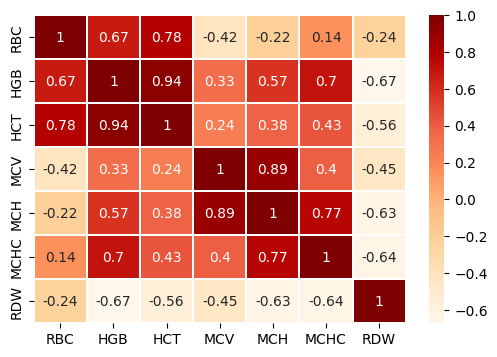

In [12]:
sns.heatmap(train.corr(), annot=True, cmap='OrRd',linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(6,4)
plt.show()

In [13]:
train = train[train['Diagnosis'] != 'mix1']
train = train[train['Diagnosis'] != 'mix2']

X = train.drop(['Diagnosis'], axis=1) # Drop the Diagnosis column
y = train['Diagnosis'] # Atake the Diagnosis column as a label
y.replace({"BTT": 0, "HbE": 0, "DB": 1, "BTT_HbE": 0}, inplace=True)


print(X)
print(y)

      RBC   HGB   HCT   MCV   MCH  MCHC   RDW
0    3.78   9.0  29.4  77.7  23.8  30.7  21.1
1    5.94  10.3  37.5  63.1  17.4  27.5  15.9
2    5.93  10.8  34.4  58.0  18.2  31.3  16.0
3    5.29  11.0  37.6  71.0  20.7  29.2  16.9
4    5.79  11.0  37.0  63.9  19.0  29.7  16.6
..    ...   ...   ...   ...   ...   ...   ...
108  5.67  13.0  41.0  72.4  23.0  31.7  15.8
109  5.24  13.3  42.7  81.4  25.5  31.3  13.6
110  5.84  13.6  43.6  74.6  23.3  31.3  17.3
111  5.56  13.9  44.6  80.2  25.0  31.2  16.0
112  5.83  14.3  43.9  75.3  24.6  32.7  14.5

[113 rows x 7 columns]
0      0
1      0
2      0
3      0
4      0
      ..
108    1
109    1
110    1
111    1
112    1
Name: Diagnosis, Length: 113, dtype: int64


In [14]:
test = test[test['Diagnosis'] != 'mix1']
test = test[test['Diagnosis'] != 'mix2']

X_t = test.drop(['Diagnosis'], axis=1) # Drop the Diagnosis column
y_t = test['Diagnosis'] # Atake the Diagnosis column as a label
y_t.replace({"BTT": 0, "HbE": 0, "DB": 1, "BTT_HbE": 0}, inplace=True)

print(X_t)
print(y_t)

     RBC   HGB   HCT   MCV   MCH  MCHC   RDW
0   5.20   9.8  31.4  60.4  18.8  31.2  16.8
1   5.26  10.9  36.4  69.2  20.8  30.1  15.5
2   5.55  11.2  36.8  66.3  20.2  30.5  16.5
3   6.61  11.7  38.1  57.7  17.7  30.7  16.9
4   4.92  11.9  37.5  76.1  24.1  31.7  16.9
5   5.92  13.0  42.3  71.4  21.9  30.6  16.8
6   6.74  14.0  46.3  68.8  20.8  30.2  16.3
7   5.96  15.0  48.5  81.4  25.1  30.8  14.3
8   4.76  11.3  35.2  74.0  23.8  32.2  14.3
9   4.95  11.9  37.9  76.7  24.0  31.3  15.1
10  5.11  12.1  37.7  73.7  23.6  32.1  14.9
11  5.25  12.3  39.1  74.6  23.5  31.5  14.8
12  5.15  12.4  40.0  77.7  24.1  31.0  15.6
13  5.05  12.6  39.2  77.5  24.9  32.1  15.0
14  4.96  12.9  40.1  81.0  26.1  32.3  18.6
15  5.28  13.2  42.2  79.9  24.9  31.2  15.1
16  5.60  13.4  42.5  75.9  23.9  31.5  14.9
17  5.84  13.6  43.8  74.9  23.3  31.1  15.3
18  6.07  14.0  44.6  73.4  23.0  31.4  16.2
19  6.22  14.7  44.4  71.3  23.7  33.2  14.9
20  6.58  14.9  47.9  72.7  22.6  31.1  14.9
21  6.69  

In [15]:
class_counts = y.value_counts()
class_counts1 = y_t.value_counts()

C:\Users\M S I\AppData\Local\Temp\ipykernel_28264\3595892926.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


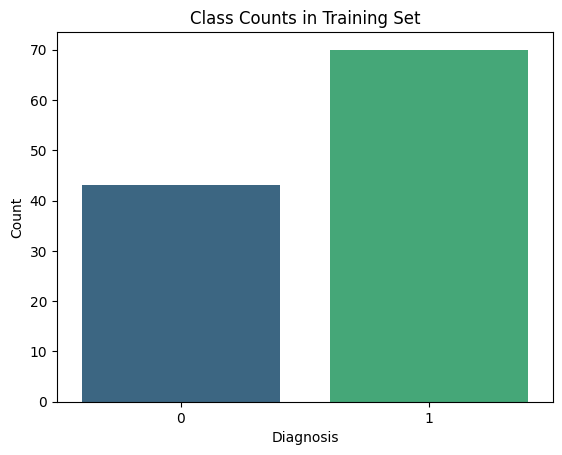

C:\Users\M S I\AppData\Local\Temp\ipykernel_28264\3595892926.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts1.index, y=class_counts1.values, palette='viridis')


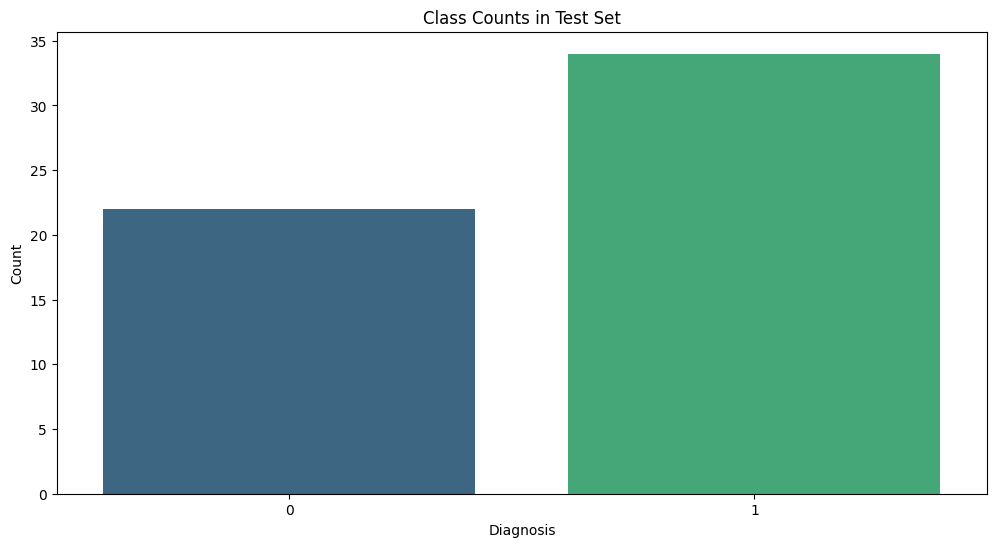

In [18]:
# Plotting class counts for the training setplt.figure(figsize=(12, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Counts in Training Set')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# Plotting class counts for the test set
plt.figure(figsize=(12, 6))
sns.barplot(x=class_counts1.index, y=class_counts1.values, palette='viridis')
plt.title('Class Counts in Test Set')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

## SVM
without tuning

In [31]:
stk = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
split = stk.split(X, y)

acc_list = []
recall_list = []
precision_list = []
f1_list = []
results_list = []
fold = 1

for i, item in enumerate(split):
    X_fold = X.copy().iloc[item[0]]
    y_fold = y.copy().iloc[item[0]]
    X_val_fold = X.copy().iloc[item[1]]
    y_val_fold = y.copy().iloc[item[1]]

    model = SVC(random_state=42)
    model.fit(X_fold, y_fold)

    y_pred_fold = model.predict(X_val_fold)

    acc = accuracy_score(y_val_fold, y_pred_fold)
    prec = precision_score(y_val_fold, y_pred_fold, average='macro', zero_division=0)
    rec = recall_score(y_val_fold, y_pred_fold, average='macro', zero_division=0)
    f1 = f1_score(y_val_fold, y_pred_fold, average='macro', zero_division=0)

    print(f'Fold {fold}')
    print(f'Akurasi: {acc}, Presisi: {prec}, Recall: {rec}, F1-Score: {f1}')
    print()

    prec_per_class = prec.tolist()
    rec_per_class = rec.tolist()
    f1_per_class = f1.tolist()

    results_list.append({
        "Fold": fold,
        "Accuracy_Mean": acc,
        "prec": prec,
        "rec": rec,
        "f1": f1,
    })

    fold += 1
    
    acc_list.append(acc)
    precision_list.append(prec)
    recall_list.append(rec)
    f1_list.append(f1)
    
acc_mean = np.mean(acc_list)
precision_mean = np.mean(precision_list)
recall_mean = np.mean(recall_list)
f1_mean = np.mean(f1_list)

print("Accuracy Mean:", acc_mean)
print("Precision Mean:", precision_mean)
print("Recall Mean:", recall_mean)
print("F1-Score Mean:", f1_mean)

Fold 1
Akurasi: 0.6521739130434783, Presisi: 0.8181818181818181, Recall: 0.5555555555555556, F1-Score: 0.4888888888888889

Fold 2
Akurasi: 0.6086956521739131, Presisi: 0.30434782608695654, Recall: 0.5, F1-Score: 0.3783783783783784

Fold 3
Akurasi: 0.6086956521739131, Presisi: 0.30434782608695654, Recall: 0.5, F1-Score: 0.3783783783783784

Fold 4
Akurasi: 0.6363636363636364, Presisi: 0.3181818181818182, Recall: 0.5, F1-Score: 0.3888888888888889

Fold 5
Akurasi: 0.6818181818181818, Presisi: 0.8333333333333333, Recall: 0.5625, F1-Score: 0.5111111111111111

Accuracy Mean: 0.6375494071146245
Precision Mean: 0.5156785243741766
Recall Mean: 0.523611111111111
F1-Score Mean: 0.4291291291291291


In [32]:
model =SVC(random_state=42)
model.fit(X,y)

y_pred_fold = model.predict(X_t)
print(classification_report(y_t, y_pred_fold))
acc = accuracy_score(y_t, y_pred_fold)
prec = precision_score(y_t, y_pred_fold, average='macro')
rec = recall_score(y_t, y_pred_fold, average='macro')
f1 = f1_score(y_t, y_pred_fold, average='macro')

print("akurasi: {:.2f}%".format(acc*100))
print("presisi: {:.2f}%".format(prec*100))
print("recall: {:.2f}%".format(rec*100))
print("f1_score: {:.2f}%".format(f1*100))

              precision    recall  f1-score   support

           0       1.00      0.23      0.37        22
           1       0.67      1.00      0.80        34

    accuracy                           0.70        56
   macro avg       0.83      0.61      0.59        56
weighted avg       0.80      0.70      0.63        56

akurasi: 69.64%
presisi: 83.33%
recall: 61.36%
f1_score: 58.52%


### Hyperparameter Tuning SVM - Optuna

In [42]:
def objective(trial):
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    C = trial.suggest_loguniform('C', 0.1, 10.0)

    stk = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    split = stk.split(X, y)

    acc_list = []

    for i, item in enumerate(split):
        X_fold = X.copy().iloc[item[0]]
        y_fold = y.copy()[item[0]]
        X_val_fold = X.copy().iloc[item[1]]
        y_val_fold = y.copy()[item[1]]

        model = SVC(random_state=42, kernel=kernel, C=C)
        model.fit(X_fold, y_fold)

        y_pred_fold = model.predict(X_val_fold)

        acc = accuracy_score(y_val_fold, y_pred_fold)
        acc_list.append(acc)

    acc_mean = np.mean(acc_list)
    return acc_mean

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train and evaluate the model with the best hyperparameters
best_kernel = best_params['kernel']
best_C = best_params['C']
best_result = train_val_SVM(best_kernel, best_C)
print(f'Best Model - kernel: {best_kernel}, C: {best_C}, Accuracy Mean: {best_result["acc_mean"]:.4f}, Precision Mean: {best_result["prec_mean"]:.4f}, Recall Mean: {best_result["recall_mean"]:.4f}, F1-Score Mean: {best_result["f1_mean"]:.4f}')

[I 2024-03-10 20:28:54,685] A new study created in memory with name: no-name-11d9d256-cb11-42df-bf4f-22cabef21c4a
C:\Users\M S I\AppData\Local\Temp\ipykernel_28264\4275409384.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 10.0)
[I 2024-03-10 20:28:54,732] Trial 0 finished with value: 0.8853754940711462 and parameters: {'kernel': 'linear', 'C': 0.758060285167571}. Best is trial 0 with value: 0.8853754940711462.
C:\Users\M S I\AppData\Local\Temp\ipykernel_28264\4275409384.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 10.0)
[I 2024-03-10 20:28:54,767] Trial 1 finished with value: 0.885

Best Hyperparameters: {'kernel': 'linear', 'C': 9.657873027336572}
Fold 0 Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.79      0.88        14

    accuracy                           0.87        23
   macro avg       0.88      0.89      0.87        23
weighted avg       0.90      0.87      0.87        23

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        14

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23

Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.92      0.86      0.89        14

    accuracy             

In [53]:
best_model = SVC(random_state=42, kernel=best_kernel, C=best_C)
best_model.fit(X, y)

# Make predictions on the test set
y_pred_test = best_model.predict(X_t)

# Print the classification report
print("Classification Report for the Best Model on the Test Set:")
print(classification_report(y_t, y_pred_test))
acc = accuracy_score(y_t, y_pred_test)
prec = precision_score(y_t, y_pred_test, average='macro')
rec = recall_score(y_t, y_pred_test, average='macro')
f1 = f1_score(y_t, y_pred_test, average='macro')

print("Accuracy: {:.2f}%".format(acc * 100))
print("Precision: {:.2f}%".format(prec * 100))
print("Recall: {:.2f}%".format(rec * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

Classification Report for the Best Model on the Test Set:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.91      0.91      0.91        34

    accuracy                           0.89        56
   macro avg       0.89      0.89      0.89        56
weighted avg       0.89      0.89      0.89        56

Accuracy: 89.29%
Precision: 88.77%
Recall: 88.77%
F1 Score: 88.77%


## Naive Bayes - (NB)

In [36]:
stk = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
split = stk.split(X, y)

acc_list = []
recall_list = []
precision_list = []
f1_list = []
results_list = []
fold = 1

for i, item in enumerate(split):
    X_fold = X.copy().iloc[item[0]]
    y_fold = y.copy().iloc[item[0]]
    X_val_fold = X.copy().iloc[item[1]]
    y_val_fold = y.copy().iloc[item[1]]

    model = GaussianNB()
    model.fit(X_fold, y_fold)

    y_pred_fold = model.predict(X_val_fold)

    acc = accuracy_score(y_val_fold, y_pred_fold)
    prec = precision_score(y_val_fold, y_pred_fold, average='macro', zero_division=0)
    rec = recall_score(y_val_fold, y_pred_fold, average='macro', zero_division=0)
    f1 = f1_score(y_val_fold, y_pred_fold, average='macro', zero_division=0)

    print(f'Fold {fold}')
    print(f'Akurasi: {acc}, Presisi: {prec}, Recall: {rec}, F1-Score: {f1}')
    print()

    prec_per_class = prec.tolist()
    rec_per_class = rec.tolist()
    f1_per_class = f1.tolist()

    results_list.append({
        "Fold": fold,
        "Accuracy_Mean": acc,
        "prec": prec,
        "rec": rec,
        "f1": f1,
    })

    fold += 1
    
    acc_list.append(acc)
    precision_list.append(prec)
    recall_list.append(rec)
    f1_list.append(f1)
    
acc_mean = np.mean(acc_list)
precision_mean = np.mean(precision_list)
recall_mean = np.mean(recall_list)
f1_mean = np.mean(f1_list)

print("Accuracy Mean:", acc_mean)
print("Precision Mean:", precision_mean)
print("Recall Mean:", recall_mean)
print("F1-Score Mean:", f1_mean)

Fold 1
Akurasi: 0.782608695652174, Presisi: 0.8214285714285714, Recall: 0.8214285714285714, F1-Score: 0.782608695652174

Fold 2
Akurasi: 0.8260869565217391, Presisi: 0.8174603174603174, Recall: 0.8174603174603174, F1-Score: 0.8174603174603174

Fold 3
Akurasi: 0.9130434782608695, Presisi: 0.9375, Recall: 0.8888888888888888, F1-Score: 0.9041666666666668

Fold 4
Akurasi: 0.8636363636363636, Presisi: 0.861904761904762, Recall: 0.8392857142857143, F1-Score: 0.8482758620689654

Fold 5
Akurasi: 0.8181818181818182, Presisi: 0.8229166666666667, Recall: 0.7767857142857143, F1-Score: 0.7904761904761904

Accuracy Mean: 0.8407114624505929
Precision Mean: 0.8522420634920636
Recall Mean: 0.8287698412698413
F1-Score Mean: 0.8285975464648627


In [37]:
model =GaussianNB()
model.fit(X,y)

y_pred_fold = model.predict(X_t)
print(classification_report(y_t, y_pred_fold))
acc = accuracy_score(y_t, y_pred_fold)
prec = precision_score(y_t, y_pred_fold, average='macro')
rec = recall_score(y_t, y_pred_fold, average='macro')
f1 = f1_score(y_t, y_pred_fold, average='macro')

print("akurasi: {:.2f}%".format(acc*100))
print("presisi: {:.2f}%".format(prec*100))
print("recall: {:.2f}%".format(rec*100))
print("f1_score: {:.2f}%".format(f1*100))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75        22
           1       0.82      0.91      0.86        34

    accuracy                           0.82        56
   macro avg       0.82      0.80      0.81        56
weighted avg       0.82      0.82      0.82        56

akurasi: 82.14%
presisi: 82.46%
recall: 79.68%
f1_score: 80.56%


### Hyperparameter Tuning NB - Optuna

In [44]:
def objective(trial):
    var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-10, 1e-5)

    stk = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    split = stk.split(X, y)

    acc_list = []

    for i, item in enumerate(split):
        X_fold = X.copy().iloc[item[0]]
        y_fold = y.copy()[item[0]]
        X_val_fold = X.copy().iloc[item[1]]
        y_val_fold = y.copy()[item[1]]

        model = GaussianNB(var_smoothing=var_smoothing)
        model.fit(X_fold, y_fold)

        y_pred_fold = model.predict(X_val_fold)

        acc = accuracy_score(y_val_fold, y_pred_fold)
        acc_list.append(acc)

    acc_mean = np.mean(acc_list)
    return acc_mean

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train and evaluate the model with the best hyperparameters
best_var = best_params['var_smoothing']
best_result = train_val_NB(best_var, X, y)
print(f'Best Model - var_smoothing: {best_var}, Accuracy Mean: {best_result["acc_mean"]:.4f}')

[I 2024-03-10 20:30:43,721] A new study created in memory with name: no-name-b3076512-7719-42e4-8f29-ba8c7f45fc05
C:\Users\M S I\AppData\Local\Temp\ipykernel_28264\3723666733.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-10, 1e-5)
[I 2024-03-10 20:30:43,755] Trial 0 finished with value: 0.8407114624505929 and parameters: {'var_smoothing': 7.005551593748019e-07}. Best is trial 0 with value: 0.8407114624505929.
C:\Users\M S I\AppData\Local\Temp\ipykernel_28264\3723666733.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-10, 1e-5)
[I 2024-03-10 

Best Hyperparameters: {'var_smoothing': 7.005551593748019e-07}
Fold 0 Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78         9
           1       1.00      0.64      0.78        14

    accuracy                           0.78        23
   macro avg       0.82      0.82      0.78        23
weighted avg       0.86      0.78      0.78        23

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.86      0.86      0.86        14

    accuracy                           0.83        23
   macro avg       0.82      0.82      0.82        23
weighted avg       0.83      0.83      0.83        23

Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.88      1.00      0.93        14

    accuracy                 

In [55]:
best_model = GaussianNB(var_smoothing=best_var)
best_model.fit(X, y)

# Make predictions on the test set
y_pred_test = best_model.predict(X_t)

# Print the classification report
print("Classification Report for the Best Model on the Test Set:")
print(classification_report(y_t, y_pred_test))
acc = accuracy_score(y_t, y_pred_test)
prec = precision_score(y_t, y_pred_test, average='macro')
rec = recall_score(y_t, y_pred_test, average='macro')
f1 = f1_score(y_t, y_pred_test, average='macro')

print("Accuracy: {:.2f}%".format(acc * 100))
print("Precision: {:.2f}%".format(prec * 100))
print("Recall: {:.2f}%".format(rec * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

Classification Report for the Best Model on the Test Set:
              precision    recall  f1-score   support

           0       0.83      0.68      0.75        22
           1       0.82      0.91      0.86        34

    accuracy                           0.82        56
   macro avg       0.82      0.80      0.81        56
weighted avg       0.82      0.82      0.82        56

Accuracy: 82.14%
Precision: 82.46%
Recall: 79.68%
F1 Score: 80.56%


## Random Forest - (RF)

In [48]:
stk = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
split = stk.split(X, y)

acc_list = []
recall_list = []
precision_list = []
f1_list = []
results_list = []
fold = 1

for i, item in enumerate(split):
    X_fold = X.copy().iloc[item[0]]
    y_fold = y.copy().iloc[item[0]]
    X_val_fold = X.copy().iloc[item[1]]
    y_val_fold = y.copy().iloc[item[1]]

    model = RandomForestClassifier(random_state=42)
    model.fit(X_fold, y_fold)

    y_pred_fold = model.predict(X_val_fold)

    acc = accuracy_score(y_val_fold, y_pred_fold)
    prec = precision_score(y_val_fold, y_pred_fold, average='macro', zero_division=0)
    rec = recall_score(y_val_fold, y_pred_fold, average='macro', zero_division=0)
    f1 = f1_score(y_val_fold, y_pred_fold, average='macro', zero_division=0)

    print(f'Fold {fold}')
    print(f'Akurasi: {acc}, Presisi: {prec}, Recall: {rec}, F1-Score: {f1}')
    print()

    prec_per_class = prec.tolist()
    rec_per_class = rec.tolist()
    f1_per_class = f1.tolist()

    results_list.append({
        "Fold": fold,
        "Accuracy_Mean": acc,
        "prec": prec,
        "rec": rec,
        "f1": f1,
    })

    fold += 1
    
    acc_list.append(acc)
    precision_list.append(prec)
    recall_list.append(rec)
    f1_list.append(f1)
    
acc_mean = np.mean(acc_list)
precision_mean = np.mean(precision_list)
recall_mean = np.mean(recall_list)
f1_mean = np.mean(f1_list)

print("Accuracy Mean:", acc_mean)
print("Precision Mean:", precision_mean)
print("Recall Mean:", recall_mean)
print("F1-Score Mean:", f1_mean)

Fold 1
Akurasi: 0.782608695652174, Presisi: 0.8214285714285714, Recall: 0.8214285714285714, F1-Score: 0.782608695652174

Fold 2
Akurasi: 0.8695652173913043, Presisi: 0.9117647058823529, Recall: 0.8333333333333333, F1-Score: 0.8516129032258064

Fold 3
Akurasi: 0.9130434782608695, Presisi: 0.9087301587301587, Recall: 0.9087301587301587, F1-Score: 0.9087301587301587

Fold 4
Akurasi: 0.9545454545454546, Presisi: 0.9444444444444444, Recall: 0.9642857142857143, F1-Score: 0.9520697167755992

Fold 5
Akurasi: 0.8636363636363636, Presisi: 0.861904761904762, Recall: 0.8392857142857143, F1-Score: 0.8482758620689654

Accuracy Mean: 0.8766798418972332
Precision Mean: 0.8896545284780579
Recall Mean: 0.8734126984126984
F1-Score Mean: 0.8686594672905408


In [58]:
model = RandomForestClassifier(random_state=42)
model.fit(X,y)

y_pred_fold = model.predict(X_t)
print(classification_report(y_t, y_pred_fold))
acc = accuracy_score(y_t, y_pred_fold)
prec = precision_score(y_t, y_pred_fold, average='macro')
rec = recall_score(y_t, y_pred_fold, average='macro')
f1 = f1_score(y_t, y_pred_fold, average='macro')

print("Accuracy: {:.2f}%".format(acc * 100))
print("Precision: {:.2f}%".format(prec * 100))
print("Recall: {:.2f}%".format(rec * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

              precision    recall  f1-score   support

           0       0.88      0.68      0.77        22
           1       0.82      0.94      0.88        34

    accuracy                           0.84        56
   macro avg       0.85      0.81      0.82        56
weighted avg       0.84      0.84      0.83        56

Accuracy: 83.93%
Precision: 85.14%
Recall: 81.15%
F1 Score: 82.30%


### Hyperparameter Tuning RF - OPTUNA

In [62]:
def train_val_RF(n_estimators, max_depth):
    stk = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    split = stk.split(X, y)

    acc_list = []

    for i, item in enumerate(split):
        X_fold = X.iloc[item[0]]
        y_fold = y.iloc[item[0]]
        X_val_fold = X.iloc[item[1]]
        y_val_fold = y.iloc[item[1]]

        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(X_fold, y_fold)

        y_pred_fold = model.predict(X_val_fold)

        acc = accuracy_score(y_val_fold, y_pred_fold)
        acc_list.append(acc)

    acc_mean = np.mean(acc_list)
    return {"acc_mean": acc_mean}

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train and evaluate the model with the best hyperparameters
best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']
best_result = train_val_RF(best_n_estimators, best_max_depth)

print(f'Best Model - n_estimators: {best_n_estimators}, max_depth: {best_max_depth}, Accuracy Mean: {best_result["acc_mean"]:.4f}')


[I 2024-03-10 20:48:06,788] A new study created in memory with name: no-name-d14a0053-3970-494d-bd91-e7ad39747f5f
[I 2024-03-10 20:48:07,019] Trial 0 finished with value: 0.8762845849802371 and parameters: {'n_estimators': 50, 'max_depth': 10}. Best is trial 0 with value: 0.8762845849802371.
[I 2024-03-10 20:48:07,161] Trial 1 finished with value: 0.8849802371541502 and parameters: {'n_estimators': 30, 'max_depth': 8}. Best is trial 1 with value: 0.8849802371541502.
[I 2024-03-10 20:48:07,256] Trial 2 finished with value: 0.8845849802371542 and parameters: {'n_estimators': 20, 'max_depth': 7}. Best is trial 1 with value: 0.8849802371541502.
[I 2024-03-10 20:48:07,538] Trial 3 finished with value: 0.867588932806324 and parameters: {'n_estimators': 50, 'max_depth': 6}. Best is trial 1 with value: 0.8849802371541502.
[I 2024-03-10 20:48:07,823] Trial 4 finished with value: 0.8762845849802371 and parameters: {'n_estimators': 40, 'max_depth': 8}. Best is trial 1 with value: 0.88498023715415

Best Hyperparameters: {'n_estimators': 30, 'max_depth': 8}
Best Model - n_estimators: 30, max_depth: 8, Accuracy Mean: 0.8850


In [64]:
best_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth)
best_model.fit(X, y)

# Make predictions on the test set
y_pred_test = best_model.predict(X_t)

# Print the classification report
print("Classification Report for the Best Model on the Test Set:")
print(classification_report(y_t, y_pred_test))

# Calculate and print additional metrics
acc = accuracy_score(y_t, y_pred_test)
prec = precision_score(y_t, y_pred_test, average='macro')
rec = recall_score(y_t, y_pred_test, average='macro')
f1 = f1_score(y_t, y_pred_test, average='macro')

print("Accuracy: {:.2f}%".format(acc * 100))
print("Precision: {:.2f}%".format(prec * 100))
print("Recall: {:.2f}%".format(rec * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

Classification Report for the Best Model on the Test Set:
              precision    recall  f1-score   support

           0       0.94      0.68      0.79        22
           1       0.82      0.97      0.89        34

    accuracy                           0.86        56
   macro avg       0.88      0.83      0.84        56
weighted avg       0.87      0.86      0.85        56

Accuracy: 85.71%
Precision: 88.12%
Recall: 82.62%
F1 Score: 84.07%


## Stacking

In [71]:
estimators = [
    ("svm", SVC(random_state=42, kernel=best_kernel, C=best_C)),
    ("nb", GaussianNB(var_smoothing=best_var)),
    ("rf", RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth))
]

In [74]:
def objective(trial):
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    C = trial.suggest_loguniform('C', 1e-2, 1e2)

    acc_list = []
    recall_list = []
    precision_list = []
    F1_Score = []

    model_stack = StackingClassifier(
        estimators=estimators,
        final_estimator=SVC(random_state=42, kernel=kernel, C=C),
        stack_method='predict'
    )

    skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    for train_index, test_index in skf.split(X, y):
        X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[test_index]

        model_stack.fit(X_train_fold, y_train_fold)
        y_pred = model_stack.predict(X_val_fold)

        acc = accuracy_score(y_val_fold, y_pred)
        prec = precision_score(y_val_fold, y_pred, average='macro', zero_division=0)
        rec = recall_score(y_val_fold, y_pred, average='macro', zero_division=0)
        f1 = f1_score(y_val_fold, y_pred, average='macro', zero_division=0)

        acc_list.append(acc)
        precision_list.append(prec)
        recall_list.append(rec)
        F1_Score.append(f1)

    acc_mean = np.mean(acc_list)
    prec_mean = np.mean(precision_list)
    recall_mean = np.mean(recall_list)
    f1_mean = np.mean(F1_Score)

    return acc_mean

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train and evaluate the model with the best hyperparameters
best_kernel = best_params['kernel']
best_C = best_params['C']

best_model_stack = StackingClassifier(
    estimators=estimators,
    final_estimator=SVC(random_state=42, kernel=best_kernel, C=best_C),
    stack_method='predict'
)
best_model_stack.fit(X, y)

y_pred_val = best_model_stack.predict(X_val_fold)
acc_val = accuracy_score(y_val_fold, y_pred_val)
prec_val = precision_score(y_val_fold, y_pred_val, average='macro')
rec_val = recall_score(y_val_fold, y_pred_val, average='macro')
f1_val = f1_score(y_val_fold, y_pred_val, average='macro')

print("Validation Metrics for Best Model:")
print("Accuracy: {:.4f}".format(acc_val))
print("Precision: {:.4f}".format(prec_val))
print("Recall: {:.4f}".format(rec_val))
print("F1-Score: {:.4f}".format(f1_val))

[I 2024-03-10 21:13:45,745] A new study created in memory with name: no-name-429ec5f0-712b-43d8-b2ae-a1d1178aef59
C:\Users\M S I\AppData\Local\Temp\ipykernel_28264\1159100928.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-2, 1e2)
[I 2024-03-10 21:13:47,173] Trial 0 finished with value: 0.8932806324110671 and parameters: {'kernel': 'rbf', 'C': 0.06974826137935025}. Best is trial 0 with value: 0.8932806324110671.
C:\Users\M S I\AppData\Local\Temp\ipykernel_28264\1159100928.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-2, 1e2)
[I 2024-03-10 21:13:48,223] Trial 1 finished with value: 0.8932

Best Hyperparameters: {'kernel': 'linear', 'C': 2.99557046793878}
Validation Metrics for Best Model:
Accuracy: 0.8636
Precision: 0.8619
Recall: 0.8393
F1-Score: 0.8483


In [76]:
estimators = [
    ("svm", SVC(random_state=42, kernel=best_kernel, C=best_C)),
    ("nb", GaussianNB(var_smoothing=best_var)),
    ("rf", RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth))
]

In [77]:
svm = StackingClassifier(
    estimators=estimators,
    final_estimator=SVC(random_state=42, kernel='linear', C=2.99557046793878),
    stack_method ='predict'
)
svm.fit(X, y)

test_pred = svm.predict(X_t)

print('Testing Classification Report:')
print(classification_report(y_t, test_pred))

# Evaluasi model
accuracy = accuracy_score(y_t, test_pred)
precision = precision_score(y_t, test_pred, average='macro')
recall = recall_score(y_t, test_pred, average='macro')
f1 = f1_score(y_t, test_pred, average='macro')

# Menampilkan hasil evaluasi
print("Akurasi: {:.4f}%".format(accuracy * 100))
print("Presisi: {:.4f}%".format(precision * 100))
print("Recall: {:.4f}%".format(recall * 100))
print("F1-score: {:.4f}%".format(f1 * 100))

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.91      0.91      0.91        34

    accuracy                           0.89        56
   macro avg       0.89      0.89      0.89        56
weighted avg       0.89      0.89      0.89        56

Akurasi: 89.2857%
Presisi: 88.7701%
Recall: 88.7701%
F1-score: 88.7701%


## Bagging RF

In [87]:
def objective(trial):
    n_estimators_bagging = trial.suggest_categorical('n_estimators_bagging', [10, 12, 15])
    n_estimators_rf = trial.suggest_categorical('n_estimators_rf', [10, 15, 20])
    max_depth_rf = trial.suggest_categorical('max_depth_rf', [1, 3, 5, 10, 20])

    result = train_val_loop_bagging(n_estimators_bagging, n_estimators_rf, max_depth_rf, print_report=False)
    
    return result['acc_mean']

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train and evaluate the model with the best hyperparameters
best_n_estimators_bagging = best_params['n_estimators_bagging']
best_n_estimators_rf = best_params['n_estimators_rf']
best_max_depth_rf = best_params['max_depth_rf']

best_result = train_val_loop_bagging(best_n_estimators_bagging, best_n_estimators_rf, best_max_depth_rf, print_report=True)
print(f'Best Model - n_estimators_bagging: {best_n_estimators_bagging}, n_estimators_rf: {best_n_estimators_rf}, max_depth_rf: {best_max_depth_rf}')
print(f'Accuracy Mean: {best_result["acc_mean"]:.4f}, Precision Mean: {best_result["precision_mean"]:.4f}, Recall Mean: {best_result["recall_mean"]:.4f}, F1-Score Mean: {best_result["f1_mean"]:.4f}')

[I 2024-03-10 22:12:47,905] A new study created in memory with name: no-name-b09c158a-b06b-4b44-9dc9-f37be00836ce
[I 2024-03-10 22:12:48,584] Trial 0 finished with value: 0.8316205533596838 and parameters: {'n_estimators_bagging': 12, 'n_estimators_rf': 10, 'max_depth_rf': 20}. Best is trial 0 with value: 0.8316205533596838.
[I 2024-03-10 22:12:50,033] Trial 1 finished with value: 0.8312252964426877 and parameters: {'n_estimators_bagging': 15, 'n_estimators_rf': 20, 'max_depth_rf': 3}. Best is trial 0 with value: 0.8316205533596838.
[I 2024-03-10 22:12:51,483] Trial 2 finished with value: 0.8494071146245059 and parameters: {'n_estimators_bagging': 15, 'n_estimators_rf': 20, 'max_depth_rf': 20}. Best is trial 2 with value: 0.8494071146245059.
[I 2024-03-10 22:12:52,221] Trial 3 finished with value: 0.8494071146245059 and parameters: {'n_estimators_bagging': 10, 'n_estimators_rf': 10, 'max_depth_rf': 10}. Best is trial 2 with value: 0.8494071146245059.
[I 2024-03-10 22:12:53,355] Trial 4

Best Hyperparameters: {'n_estimators_bagging': 10, 'n_estimators_rf': 10, 'max_depth_rf': 3}
fold 0 :
              precision    recall  f1-score   support

           0       0.64      1.00      0.78         9
           1       1.00      0.64      0.78        14

    accuracy                           0.78        23
   macro avg       0.82      0.82      0.78        23
weighted avg       0.86      0.78      0.78        23

fold 1 :
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.82      1.00      0.90        14

    accuracy                           0.87        23
   macro avg       0.91      0.83      0.85        23
weighted avg       0.89      0.87      0.86        23

fold 2 :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        14

    accuracy                           1.00        23
   macro

In [96]:
modelbgrf = BaggingClassifier(estimator=RandomForestClassifier(random_state=42, n_estimators=best_n_estimators_rf, max_depth=best_max_depth_rf), n_estimators=best_n_estimators_bagging, random_state=42)
modelbgrf.fit(X,y)

y_pred=modelbgrf.predict(X_t)

print(classification_report(y_t, y_pred))

# model evaluation
accuracy = accuracy_score(y_t, y_pred)
precision = precision_score(y_t, y_pred, average='macro')
recall = recall_score(y_t, y_pred, average='macro')
f1 = f1_score(y_t, y_pred, average='macro')

print("Akurasi: {:.2f}%".format(accuracy * 100))
print("Presisi: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-score: {:.2f}%".format(f1 * 100))

              precision    recall  f1-score   support

           0       0.93      0.59      0.72        22
           1       0.79      0.97      0.87        34

    accuracy                           0.82        56
   macro avg       0.86      0.78      0.80        56
weighted avg       0.84      0.82      0.81        56

Akurasi: 82.14%
Presisi: 85.71%
Recall: 78.07%
F1-score: 79.53%
